## Reference : 
- https://www.kaggle.com/julian3833/jigsaw-incredibly-simple-naive-bayes-0-768
- https://www.kaggle.com/samarthagarwal23/mega-b-ridge-to-the-top-0-84 

# Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import TransformerMixin, BaseEstimator
import re 
import scipy
from scipy import sparse
import gc 
from IPython.display import display, HTML
from pprint import pprint
import warnings
warnings.filterwarnings("ignore")


pd.options.display.max_colwidth=300

# Training data 

## Convert the label to SUM of all toxic labels (This might help with maintaining toxicity order of comments)

In [2]:
df = pd.read_csv("../input/jigsaw-toxic-comment-classification-challenge/train.csv")
print(df.shape)

for col in ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']:
    print(f'****** {col} *******')
    display(df.loc[df[col]==1,['comment_text',col]].sample(10))

(159571, 8)
****** toxic *******


,comment_text,toxic
48244,wah wah \n\nWhy not tell that communist faggot Jeffrey to fuck off and quit being a shit face?,1
39044,Everybody lock ur dicks cuz theyre gay!!!,1
96978,Fuck you and the beatles....,1
83222,Hiya Toots \n\nAlthough your picture is gone I still cannot get your ugly face out of my head.\nLove Wickzilla.,1
128855,How fucking dare you delete my entry about the hungarian goalkepper.,1
109637,"""\n\n Ahoy \n\nWhat's it like being the dweeb bitch of a worthless gawk cow? You should just move to DC and stick it to 'er, since she's lonely. Oh, that's right; you don't have the right equipment. Sorry, dipshitboy. Fucking moron. Justice will prevail over you """"vandal""""-chasing idjuts. We're ...",1
55950,"do i look like i give a fuck, u are all sad fucks with nothing better to do\n\nban me, i dont give a shit",1
58171,Whitman article \n\nThe article is all yours. You view the talk page to see why! ****ole!,1
144490,Pityful\nSo you call Suraye who question your Assyrianist bias as racists and Arab nationalists? so that shows how out of touch you are Sinhareb. khon your kind are as bad as Arab nationalists yourself.,1
21584,And the pay sucks o),1


****** severe_toxic *******


,comment_text,severe_toxic
92935,YOU FUCKING KIKE! DON'T EDIT THINGS YOU HAVE NO IDEA ABOUT! GIVE CREDIT WHERE IT'S DUE! YOU FUCKING KIKE! DON'T EDIT THINGS YOU HAVE NO IDEA ABOUT! GIVE CREDIT WHERE IT'S DUE! YOU FUCKING KIKE! DON'T EDIT THINGS YOU HAVE NO IDEA ABOUT! GIVE CREDIT WHERE IT'S DUE! YOU FUCKING KIKE! DON'T EDIT THI...,1
26625,your hair is lower then your mum's tits,1
71780,"Hey, you freaking retard \n\nDon't call people like UnrealCoopNet Grawp when they are obviously not Grawp.",1
50467,This user would love to suck the penis of Jesus and to lick filthy balls son of a whore.,1
45101,"WHO CARES ABOUT A BUNCH OF DIRTY MONKEYS FROM HAITI. MONCRIEF, WHAT ARE YOU A JEW?.",1
103865,"DUST FILTER, IF YOU RVV IT AGAIN! I WILL FUCKIN KILL YOU! I WILL BLOCK YOU, I WILL BLANK YOUR TALK PAGE, I WILL STEAL YOUR PASSWORD, I WILL TAKE OVER YOU! I WILL BLOCK YOU! \n\nDUST FILTER, IF YOU RVV IT AGAIN! I WILL FUCKIN KILL YOU! I WILL BLOCK YOU, I WILL BLANK YOUR TALK PAGE, I WILL STEAL Y...",1
143716,WHEN YOU COME HERE TO SAY NAUGHTY NAUGHT. GO F.U.C.K YOURSELVES.,1
104104,"""\n\n Hey and Your """"warnings"""" are redundant. As for you, Go fuck yourself! You are nothing but a motherfucking faggot with a big mouth! 24.168.117.85 """,1
78634,stupid \n\nassholes never die rightß INSTEAD; THEY BECOME WACKPEDIA ADMINS: DIE,1
93983,SHE IS SUCH A WHORE!!!!!!!!!!!!!!!!!!!!!!!,1


****** obscene *******


,comment_text,obscene
124880,"""== Proprietary Software ==\nHahaha I just read your 'heated' debate in the discussion of the article """"Proprietary Software"""". You were right in the original argument, and when everyone else started commenting and that admin warned you, you turned into SUCH A BITCH. You were right though, peopl...",1
83317,"LOSER QUESTION \n\nAny reason why you can't mind your own fucking business? Ever kissed a girl? I don't think so, at least not an attractive one\n\nGet the FUCK out of articles you don't understand, loser",1
20570,FUCK YOU Ckatz you are german Cock sucker and FUCKER MOTHER FUCKER,1
150149,"Non-notable KrakatoaKatie==\nYou and this other turd Riana dumped the article about Alison Crawford. Odds are you're not even in the UK to know who she is. It's hard to get over the fact that non-notable maggots like you can go around policing at Wikipedia, playing at and pretending to be notabl...",1
140800,"N ALL U BITCHES SO YEAH, WE DONT SPEAK GERMAN, WE ARE AMERICAN NOOBS..GO SUCK A DICK",1
149402,"I struggle to understand why you give a damn so much. Go put that anger towards something else. The few black, hell minority contestants on survivor hardly ever get recognition. Go suck a penis or something.",1
63664,"You \n\nYou, are a high and mighty dirty cunt and I want you to perish.",1
137826,oli is a dickhead oli is a dickheadItalic text oli is a dickhead oli is a dickheadItalic text\n oli is a dickhead oli is a dickheadItalic text oli is a dickhead oli is a dickheadItalic text\n oli is a dickhead oli is a dickheadItalic text oli is a dickhead oli is a dickheadItalic text\n oli is a...,1
63527,"""===Pathetic Settler===\n\nThat's what you seem to be. I'm glad your silly ass is so upset that you feel you have to engage in vandalism and spout inflammatory nonsense or ridiculous statements.\n\nLong live the Palestinian and Lebanese people. To hell with """"settler"""" reprobates.\n\n """,1
19717,"Hello giant asshole,\n\nWhat the fuck? Feetboarding is extremely popular in St. Louis. You probably wouldn't fucking know cuz u dont live in St. Louis. I do. I think i know a little more about it than you. Who the fuck are you thinking that your hotshit cuz youre the self proclaimed wikipedia po...",1


****** threat *******


,comment_text,threat
2485,"important \n\nyou and your family shall burn! you have been warned, if you do troll muzemikes talk page i will slaughter you in your sleep. bye...",1
51175,"""\nfuck you bastard. consider this your last warning. """"being a dick?"""" who do you think to talk like this on my talk page you piece of shit? next time you do that i'll unscrew your head and shit into your neck. and your gay friend falcon9x5/fin is an asshole too. """,1
153053,"let me tell you little man, a personal attack will be when I find you and beat the hell out of you. Be very glad I don't know where you live or where I can find you.",1
14401,{{Unblock|Unblock or I'll kill you.,1
115697,Nazi Bastard \n\n I will hang your corpse from a tree.,1
89651,You stupid dumb FU*K MY great great great great grandfather was Mani Singh the greatest of Sikh matrys. Its scum like you that needs to be executed. You deserve excution - you stupid dumb fu*k everyone in my family over 500 members are Baptized Khalsa SIKHS. We have been Khalsa Sikhs for over 40...,1
56561,"Our warning to you ,Weare not afraid of you blocking our edits here ,and if you keep going with this Nationalist propaganda Chauvinism and Hate speech,we might start looking for you and face you in person,so watch out !",1
73939,CaliforniaAliBaba is a Bitch\nGo fuck yourself you bitch ass motherfucker. Don't you ever in your fucking life threatening me you fucking piece of shit you. You don't know me I will fucking kill your ass you punk pussy bitch. tell your mama to my black dick.,1
151923,I will castrate you and roast your testicles. \n\nThen I will feed them to you.,1
61934,"orders\n\nDreamjerk has no right to order anyone to do anything. He is one of the more hated \nmembers of Wikipedia. Opponents just go on and do what you need to do.\n\nDaggers in back of Jack the Ripper, lubed by butter, falling on Rhobite.\n\nYou wanna play, we can play.\n\nButterknife.\n\n+++...",1


****** insult *******


,comment_text,insult
52766,NIGHTSTALLION IS A CUNT,1
126176,Allow your face. Just seen it on your user section. You are the ugliest thing i have ever seen in my intire life. Why don't you just end it all. Do us all a favour.,1
101314,Stupid Asian Bitch \n\nYou're an idiot and you should go back to ching chong land,1
105206,If they are idiots what I can do ?,1
157751,.Forsite Forsyth Boresyth.Forsyth sucks,1
15785,fuck off \n\ndon't fuck with me . fuck off,1
54525,Damn the killer Armenians... \n\nI damn all the killer armenians (they re even not human) who killed and burned all those women and children. I damn you...,1
127507,arsehole who was bullied as a child,1
107576,Your user name is stupid stopgiving me warnings you batty,1
47753,"NAH DON'T LISTEN TO THOSE REMISES, VANDALISE THE FUCK OUT OF THAT SHITBAG KINU'S TALK PAGE 94.2.84.203",1


****** identity_hate *******


,comment_text,identity_hate
132020,"""\nYes yes, """"personnal attacks"""", reacting to homophobic attacks. I am fairly proud about my behavior, despite I am blocked. Lestrade is a genuine silly homophobe, it's a fact """,1
8050,"Hey white person, you suck. Stop being so white. Nigger pride. \n-(non-white person)",1
36995,fuck all u weak ass niggaz,1
35743,Very short and very clear \n\nSlaves - to gas chambers.,1
118029,why'd you remove that \n\nu nlgga,1
85222,this is your final warning. i am a fag. yeah thats right i'm gay. i am a wikipedia admin and i never get laid. 21:24,1
154338,Islam is racist it kills people that resist it. Like the Cybermen it is convert or die and if you resist instant death.,1
102203,Uncle Tom House Niggers,1
101197,"Albanians are terrorists \n\nI know that all albanians (with little a) are terrorists. Since they burned 300 churches, supported terrorist, can't let Serbs live on their land (Serbian Kosovo), slaughtered and burned Serbian children allive (Serbian babies Sava from Prizren in 1999. and Marija fr...",1
39886,"please, please killyourself you whiney little jewish faggot",1


In [3]:

# Give more weight to severe toxic 
df['severe_toxic'] = df.severe_toxic * 2
df['y'] = (df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].sum(axis=1) ).astype(int)
df['y'] = df['y']/df['y'].max()

df = df[['comment_text', 'y']].rename(columns={'comment_text': 'text'})
df.sample(5)

,text,y
35481,"What's wrong with you? \n\nWhy have you got rid of all the other people who took part in the battle along with the Normans (Poitevins, Manceaux, Bretons, French...etc).\nIs English butthurt the reason?\nIn any case, this is pathetic.",0.000000
91412,"""\n\nRetail stores are not a reliable source for video game release dates. The gamestop clerk was guessing as the myriad of game pre-order websites have (almost all showing their own """"release date""""). June 2nd is by know means """"confirmed"""" because a gamestop clerk said so. We link to the se...",0.000000
10993,Fuck off \n\nyou can fuck right off mate!,0.428571
40401,"Wikipedia:Headless Chickens \n\nI have nominated your headless chicken page for deletion as it is useless. Lets hope it gets deleted, yes.",0.142857
86923,""":Hello Summer song, I have reverted eschatology back to the main page. Eschatology has nothing whatsoever to do with """"opposition to Jehovah's Witnesses"""". Eschatology is about signs, predictions, and biblical text about the keen interest Christians have about the coming of Christ's Kingdom. It...",0.000000


In [4]:
df['y'].value_counts()

0.000000    143346
0.142857      6360
0.428571      4064
0.285714      3439
0.714286      1064
0.571429       938
0.857143       329
1.000000        31
Name: y, dtype: int64

## Create 3 versions of the data

In [5]:
n_folds = 7

frac_1 = 0.7
frac_1_factor = 1.5

for fld in range(n_folds):
    print(f'Fold: {fld}')
    tmp_df = pd.concat([df[df.y>0].sample(frac=frac_1, random_state = 10*(fld+1)) , 
                        df[df.y==0].sample(n=int(len(df[df.y>0])*frac_1*frac_1_factor) , 
                                            random_state = 10*(fld+1))], axis=0).sample(frac=1, random_state = 10*(fld+1))

    tmp_df.to_csv(f'/kaggle/working/df_fld{fld}.csv', index=False)
    print(tmp_df.shape)
    print(tmp_df['y'].value_counts())

Fold: 0
(28394, 2)
0.000000    17036
0.142857     4433
0.428571     2823
0.285714     2442
0.714286      742
0.571429      673
0.857143      223
1.000000       22
Name: y, dtype: int64
Fold: 1
(28394, 2)
0.000000    17036
0.142857     4432
0.428571     2840
0.285714     2391
0.714286      751
0.571429      685
0.857143      237
1.000000       22
Name: y, dtype: int64
Fold: 2
(28394, 2)
0.000000    17036
0.142857     4472
0.428571     2818
0.285714     2404
0.714286      735
0.571429      661
0.857143      248
1.000000       20
Name: y, dtype: int64
Fold: 3
(28394, 2)
0.000000    17036
0.142857     4469
0.428571     2842
0.285714     2415
0.714286      719
0.571429      657
0.857143      240
1.000000       16
Name: y, dtype: int64
Fold: 4
(28394, 2)
0.000000    17036
0.142857     4437
0.428571     2869
0.285714     2389
0.714286      745
0.571429      679
0.857143      218
1.000000       21
Name: y, dtype: int64
Fold: 5
(28394, 2)
0.000000    17036
0.142857     4480
0.428571     2840
0.

# Create 3 versions of __clean__ data

In [6]:
def clean(data, col):

    # Clean some punctutations
    data[col] = data[col].str.replace('\n', ' \n ')
    data[col] = data[col].str.replace(r'([a-zA-Z]+)([/!?.])([a-zA-Z]+)',r'\1 \2 \3')
    # Replace repeating characters more than 3 times to length of 3
    data[col] = data[col].str.replace(r'([*!?\'])\1\1{2,}',r'\1\1\1')    
    # Add space around repeating characters
    data[col] = data[col].str.replace(r'([*!?\']+)',r' \1 ')    
    # patterns with repeating characters 
    data[col] = data[col].str.replace(r'([a-zA-Z])\1{2,}\b',r'\1\1')
    data[col] = data[col].str.replace(r'([a-zA-Z])\1\1{2,}\B',r'\1\1\1')
    data[col] = data[col].str.replace(r'[ ]{2,}',' ').str.strip()   
    
    return data

In [7]:
# Test clean function
test_clean_df = pd.DataFrame({"text":
                              ["heyy\n\nkkdsfj",
                               "hi   how/are/you ???",
                               "hey?????",
                               "noooo!!!!!!!!!   comeone !! ",
                              "cooooooooool     brooooooooooo  coool brooo",
                              "naaaahhhhhhh"]})
display(test_clean_df)
clean(test_clean_df,'text')

,text
0,heyy\n\nkkdsfj
1,hi how/are/you ???
2,hey?????
3,noooo!!!!!!!!! comeone !!
4,cooooooooool brooooooooooo coool brooo
5,naaaahhhhhhh


,text
0,heyy \n \n kkdsfj
1,hi how / are/you ???
2,hey ???
3,noo !!! comeone !!
4,coool broo coool broo
5,naaahh


In [8]:
df = clean(df,'text')

In [9]:
n_folds = 7

frac_1 = 0.7
frac_1_factor = 1.5

for fld in range(n_folds):
    print(f'Fold: {fld}')
    tmp_df = pd.concat([df[df.y>0].sample(frac=frac_1, random_state = 10*(fld+1)) , 
                        df[df.y==0].sample(n=int(len(df[df.y>0])*frac_1*frac_1_factor) , 
                                            random_state = 10*(fld+1))], axis=0).sample(frac=1, random_state = 10*(fld+1))

    tmp_df.to_csv(f'/kaggle/working/df_clean_fld{fld}.csv', index=False)
    print(tmp_df.shape)
    print(tmp_df['y'].value_counts())

Fold: 0
(28394, 2)
0.000000    17036
0.142857     4433
0.428571     2823
0.285714     2442
0.714286      742
0.571429      673
0.857143      223
1.000000       22
Name: y, dtype: int64
Fold: 1
(28394, 2)
0.000000    17036
0.142857     4432
0.428571     2840
0.285714     2391
0.714286      751
0.571429      685
0.857143      237
1.000000       22
Name: y, dtype: int64
Fold: 2
(28394, 2)
0.000000    17036
0.142857     4472
0.428571     2818
0.285714     2404
0.714286      735
0.571429      661
0.857143      248
1.000000       20
Name: y, dtype: int64
Fold: 3
(28394, 2)
0.000000    17036
0.142857     4469
0.428571     2842
0.285714     2415
0.714286      719
0.571429      657
0.857143      240
1.000000       16
Name: y, dtype: int64
Fold: 4
(28394, 2)
0.000000    17036
0.142857     4437
0.428571     2869
0.285714     2389
0.714286      745
0.571429      679
0.857143      218
1.000000       21
Name: y, dtype: int64
Fold: 5
(28394, 2)
0.000000    17036
0.142857     4480
0.428571     2840
0.

In [10]:
del df,tmp_df
gc.collect()

21

## Ruddit data

(5838, 5)


<AxesSubplot:>

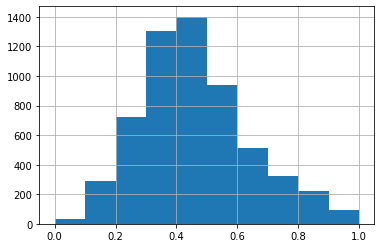

In [11]:
df_ = pd.read_csv("../input/ruddit-jigsaw-dataset/Dataset/ruddit_with_text.csv")
print(df_.shape)

df_ = df_[['txt', 'offensiveness_score']].rename(columns={'txt': 'text',
                                                                'offensiveness_score':'y'})

df_['y'] = (df_['y'] - df_.y.min()) / (df_.y.max() - df_.y.min()) 
df_.y.hist()

# Create 3 versions of data

In [12]:
n_folds = 7

frac_1 = 0.7

for fld in range(n_folds):
    print(f'Fold: {fld}')
    tmp_df = df_.sample(frac=frac_1, random_state = 10*(fld+1))
    tmp_df.to_csv(f'/kaggle/working/df2_fld{fld}.csv', index=False)
    print(tmp_df.shape)
    print(tmp_df['y'].value_counts())

Fold: 0
(4087, 2)
0.464668    125
0.475910    106
0.375268     94
0.442719     92
0.364561     89
           ... 
0.400964      1
0.889722      1
0.582976      1
0.404711      1
0.761242      1
Name: y, Length: 268, dtype: int64
Fold: 1
(4087, 2)
0.464668    107
0.475910    103
0.408994    102
0.386510     97
0.364561     88
           ... 
0.851713      1
0.859743      1
0.051927      1
0.666488      1
0.594754      1
Name: y, Length: 264, dtype: int64
Fold: 2
(4087, 2)
0.464668    118
0.475910    102
0.386510     94
0.442719     92
0.364561     89
           ... 
0.261777      1
0.238223      1
0.123126      1
0.694861      1
0.309422      1
Name: y, Length: 265, dtype: int64
Fold: 3
(4087, 2)
0.464668    116
0.475910    106
0.386510     93
0.408994     92
0.364561     90
           ... 
0.238223      1
0.561028      1
0.404711      1
0.806210      1
0.184154      1
Name: y, Length: 263, dtype: int64
Fold: 4
(4087, 2)
0.464668    122
0.475910    114
0.386510    100
0.442719     91
0.

In [13]:
del tmp_df, df_; 
gc.collect()

42

## Load Validation and Test data  


In [14]:
# Validation data 

df_val = pd.read_csv("../input/jigsaw-toxic-severity-rating/validation_data.csv")

In [15]:
# Test data

df_sub = pd.read_csv("../input/jigsaw-toxic-severity-rating/comments_to_score.csv")


# Create Sklearn Pipeline with 
## TFIDF - Take 'char_wb' as analyzer to capture subwords well
## Ridge - Ridge is a simple regression algorithm that will reduce overfitting 

In [16]:
# NOT USED 
class LengthTransformer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return sparse.csr_matrix([[(len(x)-360)/550] for x in X])
    def get_feature_names(self):
        return ["lngth"]

class LengthUpperTransformer(BaseEstimator, TransformerMixin):

    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return sparse.csr_matrix([[sum([1 for y in x if y.isupper()])/len(x)] for x in X])
    def get_feature_names(self):
        return ["lngth_uppercase"]

### Does % of uppercase characters have effect on toxicity


0.06762926181756569 0.1429820536279063
0.10522553566497922 0.20361944552165576


<AxesSubplot:>

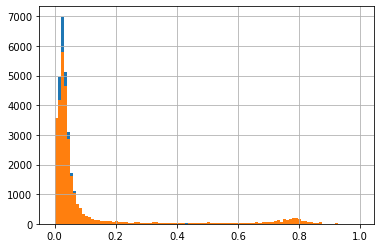

In [17]:

df_val['upper_1'] = np.array(LengthUpperTransformer().transform(df_val['less_toxic']).todense()).reshape(-1,1)
df_val['upper_2'] = np.array(LengthUpperTransformer().transform(df_val['more_toxic']).todense()).reshape(-1,1)

print(df_val['upper_1'].mean(), df_val['upper_1'].std())
print(df_val['upper_2'].mean(), df_val['upper_2'].std())

df_val['upper_1'].hist(bins=100)
df_val['upper_2'].hist(bins=100)

## Train pipeline

- Load folds data
- train pipeline
- Predict on validation data
- Predict on test data

### Toxic data

In [18]:
val_preds_arr1 = np.zeros((df_val.shape[0], n_folds))
val_preds_arr2 = np.zeros((df_val.shape[0], n_folds))
test_preds_arr = np.zeros((df_sub.shape[0], n_folds))

for fld in range(n_folds):
    print("\n\n")
    print(f' ****************************** FOLD: {fld} ******************************')
    df = pd.read_csv(f'/kaggle/working/df_fld{fld}.csv')
    print(df.shape)

    features = FeatureUnion([
        #('vect1', LengthTransformer()),
        #('vect2', LengthUpperTransformer()),
        ("vect3", TfidfVectorizer(min_df= 3, max_df=0.5, analyzer = 'char_wb', ngram_range = (3,5))),
        #("vect4", TfidfVectorizer(min_df= 5, max_df=0.5, analyzer = 'word', token_pattern=r'(?u)\b\w{8,}\b')),

    ])
    pipeline = Pipeline(
        [
            ("features", features),
            #("clf", RandomForestRegressor(n_estimators = 5, min_sample_leaf=3)),
            ("clf", Ridge()),
            #("clf",LinearRegression())
        ]
    )
    print("\nTrain:")
    # Train the pipeline
    pipeline.fit(df['text'], df['y'])
    
    # What are the important features for toxicity

    print('\nTotal number of features:', len(pipeline['features'].get_feature_names()) )

    feature_wts = sorted(list(zip(pipeline['features'].get_feature_names(), 
                                  np.round(pipeline['clf'].coef_,2) )), 
                         key = lambda x:x[1], 
                         reverse=True)

    pprint(feature_wts[:30])
    
    print("\npredict validation data ")
    val_preds_arr1[:,fld] = pipeline.predict(df_val['less_toxic'])
    val_preds_arr2[:,fld] = pipeline.predict(df_val['more_toxic'])

    print("\npredict test data ")
    test_preds_arr[:,fld] = pipeline.predict(df_sub['text'])




 ****************************** FOLD: 0 ******************************
(28394, 2)

Train:

Total number of features: 146616
[('vect3__uck', 0.53),
 ('vect3__fuc', 0.49),
 ('vect3__ ass', 0.4),
 ('vect3__fuck', 0.38),
 ('vect3__ f ', 0.34),
 ('vect3__ass', 0.32),
 ('vect3__fag', 0.32),
 ('vect3__shit', 0.31),
 ('vect3__ f*', 0.3),
 ('vect3__ fag', 0.29),
 ('vect3__gay', 0.28),
 ('vect3__nig', 0.28),
 ('vect3__nl3', 0.28),
 ('vect3__ fu', 0.27),
 ('vect3__dick', 0.27),
 ('vect3__hit', 0.27),
 ('vect3__nigg', 0.27),
 ('vect3__ck ', 0.26),
 ('vect3__fuk', 0.26),
 ('vect3__ g ', 0.25),
 ('vect3__ nl', 0.25),
 ('vect3__ die', 0.24),
 ('vect3__ gay', 0.24),
 ('vect3__dum', 0.24),
 ('vect3__gga', 0.24),
 ('vect3__kill ', 0.24),
 ('vect3__ ass.', 0.23),
 ('vect3__ u ', 0.23),
 ('vect3__cun', 0.23),
 ('vect3__igg', 0.23)]

predict validation data 

predict test data 



 ****************************** FOLD: 1 ******************************
(28394, 2)

Train:

Total number of features: 145297


# Toxic __clean__ data

In [19]:
val_preds_arr1c = np.zeros((df_val.shape[0], n_folds))
val_preds_arr2c = np.zeros((df_val.shape[0], n_folds))
test_preds_arrc = np.zeros((df_sub.shape[0], n_folds))

for fld in range(n_folds):
    print("\n\n")
    print(f' ****************************** FOLD: {fld} ******************************')
    df = pd.read_csv(f'/kaggle/working/df_clean_fld{fld}.csv')
    print(df.shape)

    features = FeatureUnion([
        #('vect1', LengthTransformer()),
        #('vect2', LengthUpperTransformer()),
        ("vect3", TfidfVectorizer(min_df= 3, max_df=0.5, analyzer = 'char_wb', ngram_range = (3,5))),
        #("vect4", TfidfVectorizer(min_df= 5, max_df=0.5, analyzer = 'word', token_pattern=r'(?u)\b\w{8,}\b')),

    ])
    pipeline = Pipeline(
        [
            ("features", features),
            #("clf", RandomForestRegressor(n_estimators = 5, min_sample_leaf=3)),
            ("clf", Ridge()),
            #("clf",LinearRegression())
        ]
    )
    print("\nTrain:")
    # Train the pipeline
    pipeline.fit(df['text'], df['y'])
    
    # What are the important features for toxicity

    print('\nTotal number of features:', len(pipeline['features'].get_feature_names()) )

    feature_wts = sorted(list(zip(pipeline['features'].get_feature_names(), 
                                  np.round(pipeline['clf'].coef_,2) )), 
                         key = lambda x:x[1], 
                         reverse=True)

    pprint(feature_wts[:30])
    
    print("\npredict validation data ")
    val_preds_arr1c[:,fld] = pipeline.predict(df_val['less_toxic'])
    val_preds_arr2c[:,fld] = pipeline.predict(df_val['more_toxic'])

    print("\npredict test data ")
    test_preds_arrc[:,fld] = pipeline.predict(df_sub['text'])




 ****************************** FOLD: 0 ******************************
(28394, 2)

Train:

Total number of features: 133784
[('vect3__uck', 0.5),
 ('vect3__ f ', 0.48),
 ('vect3__fuc', 0.45),
 ('vect3__ ass', 0.37),
 ('vect3__fuck', 0.35),
 ('vect3__shit', 0.32),
 ('vect3__ ck', 0.31),
 ('vect3__fag', 0.31),
 ('vect3__ fu', 0.29),
 ('vect3__ass', 0.29),
 ('vect3__ k ', 0.28),
 ('vect3__ re ', 0.28),
 ('vect3__hit', 0.28),
 ('vect3__ck ', 0.27),
 ('vect3__fuk', 0.27),
 ('vect3__nig', 0.27),
 ('vect3__nl3', 0.27),
 ('vect3__ fag', 0.26),
 ('vect3__gga', 0.26),
 ('vect3__dick', 0.25),
 ('vect3__gay', 0.25),
 ('vect3__suck', 0.25),
 ('vect3__ ass.', 0.24),
 ('vect3__ g ', 0.24),
 ('vect3__ gay', 0.24),
 ('vect3__ nl', 0.24),
 ('vect3__nigg', 0.24),
 ('vect3__ ass ', 0.23),
 ('vect3__ fuk', 0.23),
 ('vect3__ rape', 0.23)]

predict validation data 

predict test data 



 ****************************** FOLD: 1 ******************************
(28394, 2)

Train:

Total number of features: 13

## Ruddit data pipeline

In [20]:
val_preds_arr1_ = np.zeros((df_val.shape[0], n_folds))
val_preds_arr2_ = np.zeros((df_val.shape[0], n_folds))
test_preds_arr_ = np.zeros((df_sub.shape[0], n_folds))

for fld in range(n_folds):
    print("\n\n")
    print(f' ****************************** FOLD: {fld} ******************************')
    df = pd.read_csv(f'/kaggle/working/df2_fld{fld}.csv')
    print(df.shape)

    features = FeatureUnion([
        #('vect1', LengthTransformer()),
        #('vect2', LengthUpperTransformer()),
        ("vect3", TfidfVectorizer(min_df= 3, max_df=0.5, analyzer = 'char_wb', ngram_range = (3,5))),
        #("vect4", TfidfVectorizer(min_df= 5, max_df=0.5, analyzer = 'word', token_pattern=r'(?u)\b\w{8,}\b')),

    ])
    pipeline = Pipeline(
        [
            ("features", features),
            #("clf", RandomForestRegressor(n_estimators = 5, min_sample_leaf=3)),
            ("clf", Ridge()),
            #("clf",LinearRegression())
        ]
    )
    print("\nTrain:")
    # Train the pipeline
    pipeline.fit(df['text'], df['y'])
    
    # What are the important features for toxicity

    print('\nTotal number of features:', len(pipeline['features'].get_feature_names()) )

    feature_wts = sorted(list(zip(pipeline['features'].get_feature_names(), 
                                  np.round(pipeline['clf'].coef_,2) )), 
                         key = lambda x:x[1], 
                         reverse=True)

    pprint(feature_wts[:30])
    
    print("\npredict validation data ")
    val_preds_arr1_[:,fld] = pipeline.predict(df_val['less_toxic'])
    val_preds_arr2_[:,fld] = pipeline.predict(df_val['more_toxic'])

    print("\npredict test data ")
    test_preds_arr_[:,fld] = pipeline.predict(df_sub['text'])




 ****************************** FOLD: 0 ******************************
(4087, 2)

Train:

Total number of features: 31907
[('vect3__fuc', 0.59),
 ('vect3__fuck', 0.59),
 ('vect3__uck', 0.55),
 ('vect3__ fuc', 0.52),
 ('vect3__ fuck', 0.52),
 ('vect3__ fu', 0.42),
 ('vect3__shit', 0.4),
 ('vect3__hit', 0.37),
 ('vect3__ shit', 0.36),
 ('vect3__fuck ', 0.34),
 ('vect3__ck ', 0.32),
 ('vect3__uck ', 0.31),
 ('vect3__shi', 0.29),
 ('vect3__ shi', 0.28),
 ('vect3__ ass ', 0.27),
 ('vect3__sex', 0.26),
 ('vect3__ ass', 0.25),
 ('vect3__ dick', 0.25),
 ('vect3__dick', 0.25),
 ('vect3__ dic', 0.24),
 ('vect3__ sex', 0.24),
 ('vect3__ sh', 0.23),
 ('vect3__shit ', 0.23),
 ('vect3__ass', 0.21),
 ('vect3__ di', 0.19),
 ('vect3__ du', 0.18),
 ('vect3__!!!', 0.18),
 ('vect3__dic', 0.18),
 ('vect3__ex ', 0.18),
 ('vect3__hit ', 0.18)]

predict validation data 

predict test data 



 ****************************** FOLD: 1 ******************************
(4087, 2)

Train:

Total number of features:

In [21]:
del df, pipeline, feature_wts
gc.collect()

597

# Validate the pipeline 

In [22]:
print(" Toxic data ")
p1 = val_preds_arr1.mean(axis=1)
p2 = val_preds_arr2.mean(axis=1)

print(f'Validation Accuracy is { np.round((p1 < p2).mean() * 100,2)}')

print(" Ruddit data ")
p3 = val_preds_arr1_.mean(axis=1)
p4 = val_preds_arr2_.mean(axis=1)

print(f'Validation Accuracy is { np.round((p3 < p4).mean() * 100,2)}')

print(" Toxic CLEAN data ")
p5 = val_preds_arr1c.mean(axis=1)
p6 = val_preds_arr2c.mean(axis=1)

print(f'Validation Accuracy is { np.round((p5 < p6).mean() * 100,2)}')


 Toxic data 
Validation Accuracy is 68.46
 Ruddit data 
Validation Accuracy is 62.56
 Toxic CLEAN data 
Validation Accuracy is 68.28


In [23]:
print("Find right weight")

wts_acc = []
for i in range(30,70,1):
    for j in range(0,20,1):
        w1 = i/100
        w2 = (100 - i - j)/100
        w3 = (1 - w1 - w2 )
        p1_wt = w1*p1 + w2*p3 + w3*p5
        p2_wt = w1*p2 + w2*p4 + w3*p6
        wts_acc.append( (w1,w2,w3, 
                         np.round((p1_wt < p2_wt).mean() * 100,2))
                      )
sorted(wts_acc, key=lambda x:x[3], reverse=True)[:5]

Find right weight


[(0.54, 0.29, 0.16999999999999998, 69.04),
 (0.55, 0.29, 0.15999999999999998, 69.04),
 (0.56, 0.29, 0.14999999999999997, 69.04),
 (0.61, 0.28, 0.10999999999999999, 69.03),
 (0.64, 0.24, 0.12, 69.03)]

In [24]:
w1,w2,w3,_ = sorted(wts_acc, key=lambda x:x[2], reverse=True)[0]
#print(best_wts)

p1_wt = w1*p1 + w2*p3 + w3*p5
p2_wt = w1*p2 + w2*p4 + w3*p6


## Analyze bad predictions 
### Incorrect predictions with similar scores
### Incorrect predictions with different scores

In [25]:
df_val['p1'] = p1_wt
df_val['p2'] = p2_wt
df_val['diff'] = np.abs(p2_wt - p1_wt)

df_val['correct'] = (p1_wt < p2_wt).astype('int')


In [26]:

### Incorrect predictions with similar scores

df_val[df_val.correct == 0].sort_values('diff', ascending=True).head(20)

,worker,less_toxic,more_toxic,upper_1,upper_2,p1,p2,diff,correct
21672,674,"""Why is there even an """"Edit"""" option anyway?\nMaybe if they took it off there wouldn't be as much vandalism.\n\n""","I've blocked you (again, sigh). .",0.027027,0.028571,0.199004,0.198983,0.000021,0
23238,666,"""It's not all of a sudden, check the article's discussion page, I have proven that he's an Arab: so, not all sources agree. Also, please do tell me what other """"numerous sources"""" you have to provide? Obviously it's a weasel word, you only have one source, same as me. This makes it at the very ...","""bomb in the Diplomat hotel 20 minutes ago...after the feast...tell the government that we will destroy everyplace."""" \n """,0.020000,0.008264,0.251985,0.251951,0.000034,0
465,9,"RE: Pygmy Guru \n\nI'm not asking for your support. I'm expressing my general dismay in finding my article deleted. All the time and thought put into that article was wasted. Wikipedia is the collaboration of minds and people, to create a digital encyclopedia where simple folk like myself can v...",nonsense? \n\nwho are you to tell me that my truthful info about rfk jr is nonsense?,0.030612,0.000000,0.261887,0.261804,0.000083,0
466,171,"RE: Pygmy Guru \n\nI'm not asking for your support. I'm expressing my general dismay in finding my article deleted. All the time and thought put into that article was wasted. Wikipedia is the collaboration of minds and people, to create a digital encyclopedia where simple folk like myself can v...",nonsense? \n\nwho are you to tell me that my truthful info about rfk jr is nonsense?,0.030612,0.000000,0.261887,0.261804,0.000083,0
467,729,"RE: Pygmy Guru \n\nI'm not asking for your support. I'm expressing my general dismay in finding my article deleted. All the time and thought put into that article was wasted. Wikipedia is the collaboration of minds and people, to create a digital encyclopedia where simple folk like myself can v...",nonsense? \n\nwho are you to tell me that my truthful info about rfk jr is nonsense?,0.030612,0.000000,0.261887,0.261804,0.000083,0
14876,513,"Jesus, how much other stuff are you white washing?","""\n\n""""The WWE Raw guest host initiative was introduced on June 15, 2009 by Donald Trump during his time as owner of the Raw franchise."""" This is Wikipedia all over. Listing stories as facts...Jesus Christ. Grow a brain, the first step might be to stop watching a product churned solely for child...",0.019608,0.096491,0.280802,0.280698,0.000103,0
14877,268,"Jesus, how much other stuff are you white washing?","""\n\n""""The WWE Raw guest host initiative was introduced on June 15, 2009 by Donald Trump during his time as owner of the Raw franchise."""" This is Wikipedia all over. Listing stories as facts...Jesus Christ. Grow a brain, the first step might be to stop watching a product churned solely for child...",0.019608,0.096491,0.280802,0.280698,0.000103,0
2934,686,"""\n\nOh hell... i will not remove my personel opionion... can't you make it simple for all and block me for 2 weeks due to my personal attack?... [here is something funny, consider it as a break for exhausting thoughts """"Lost - what happens next"""" > ] ""","Drop Dead! \n\nI'm not gonna bother with you, wait till my dad comes.",0.007905,0.044118,0.242708,0.242603,0.000104,0
4862,173,"""No, what you've done is prove you're clueless.\n\n1) DID YOU READ THE TAG THAT THE ADMINISTRATOR PUT AT THE TOP OF THE PAGE? OBJECTIONS ARE TO GO TO THE DISCUSSION PAGE WHILE THE PAGE IS UNDER CONSTRUCTION. STOP BEING A PEST. YOU'RE NOT HELPINGYOUR GRINDING YOUR PERSONAL AXE like an immature li...","Ciao\n\nWhats up with that ? I thought Sonny Bonno was dead. You could very well be a man I knew from Youngstown., or perhaps Michigan. But that Ciao bullshit reminds me of Charlie.....Smith was actually directed by the California office to sell off those shops. Although many times his conversat...",0.228996,0.037866,0.313908,0.313788,0.000119,0
4861,416,"""No, what 

#### Some of these just look incorrectly tagged 


In [27]:
### Incorrect predictions with dis-similar scores


df_val[df_val.correct == 0].sort_values('diff', ascending=False).head(20)

,worker,less_toxic,more_toxic,upper_1,upper_2,p1,p2,diff,correct
25062,246,CaliforniaAliBaba is a Bitch\nGo fuck yourself you bitch ass motherfucker. Don't you ever in your fucking life threatening me you fucking piece of shit you. You don't know me I will fucking kill your ass you punk pussy bitch. tell your mama to my black dick.,I've heard a snippet on their myspace page but I'm afraid I haven't given them much though musically as of yet. Perhaps I will be purchasing one of their albums since I seem to spend about a third of my time on wiki reverting their vandalism.,0.031128,0.024390,1.177300,0.166489,1.010811,0
25754,190,what the hell man? why did you delete my page (savannah hoard) screw you dude\n\ni mean really? if you're not gonna let me have a page then you can go fuck your fat self you 40 year old bitch\n\nyour a total bitch who goes around deleting people's pages you fucking disgust me im gonna kick your ...,""" December 2009 (UTC)\n\n Now there's typical AGW alarmist Watermelon argumentum ad hominem content-vacant suppressive authoritarian WikiNazi rottenness if ever it got posted online. Don't address Monckton's (or Nsaa's) position, but strive (with utter ineffectiveness, I might add) to fault the ...",0.000000,0.039146,0.993963,0.239849,0.754114,0
17192,347,fuck this this is bull shit and it does not even say where shit comes from your fucking ass,Just To Let You Know. You have no life.\nI hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I ...,0.000000,0.091365,1.040054,0.308214,0.731839,0
17193,238,fuck this this is bull shit and it does not even say where shit comes from your fucking ass,Just To Let You Know. You have no life.\nI hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I hate you.I ...,0.000000,0.091365,1.040054,0.308214,0.731839,0
21059,333,fuck you \n\nyou're an idiot,"What makes you an editor? Why do you use the name of a great dead man? What is your true name, profession, country? \nShamir",0.000000,0.032520,0.970548,0.245773,0.724774,0
9520,102,by the way I AM A FUCKIN FAG FUCK U,"You are a troublemaker, a liar, and a malicious scumbag. If you are looking for trouble, then keep removing links from the article.",0.500000,0.015038,1.000639,0.287374,0.713265,0
20435,504,Fuck you niggerkite. y you deleting so much shit. fuckn loser. dont delete anymore shit. its none of your fucking business,"Bush is the man. \n\nHe had the balls to dispose of Saddam and declare war on Islamic fundamentalism. Regardless of how he went about doing it, or his interest in oil, he did it. He can have the oil, if that's what he wants in return for ridding the world of religious tyranny (hopefully startin...",0.008197,0.027027,0.975805,0.263063,0.712742,0
19411,46,"Ok, what is it \n\nWhy are you such a queer.. you have no power, so why the FUCK are you acting like you do. Grow up you fucking stupid shit head cock eating bastard.. seriously! Get a life, you're just a 17 yo piece of shit.",wow the guy who deleated the stuff on the Habbo NSM is leet. 88!,0.035714,0.062500,0.957254,0.249129,0.708126,0
14595,415,"Hello fuckhead,\nContributions my faggot asshole. You think that because im gay that i dont know shit. you are wrong. you just sit there with nothing to do with your pathetic fucking life that you decide to go and be a complete prick on wikipedia and just delete whatever the fuck u want. Thanks ...",User Syrthiss is a mot*herfuc*ker assh*ole ha ha ha,0.013115,0.039216,1.076638,0.382659,0.693979,0
4866,609,Hey Man\nYou are a retarded Mexican cocksucking piece of fucking shit. Please go fucking kill yourself. Wikipedia admins are lowe

# Predict on test data 

In [28]:
# Predict using pipeline

df_sub['score'] = w1*test_preds_arr.mean(axis=1) + w2*test_preds_arr_.mean(axis=1) + w3*test_preds_arrc.mean(axis=1)

In [29]:
#test_preds_arr

## Correct the rank ordering

In [30]:
# Cases with duplicates scores

df_sub['score'].count() - df_sub['score'].nunique()

14

In [31]:
same_score = df_sub['score'].value_counts().reset_index()[:10]
same_score

,index,score
0,0.707015,3
1,0.553257,2
2,0.320796,2
3,0.323360,2
4,0.288268,2
5,0.342407,2
6,0.338968,2
7,0.167900,2
8,0.367005,2
9,0.295053,2


In [32]:
df_sub[df_sub['score'].isin(same_score['index'].tolist())]

,comment_id,text,score
1832,95080362,"""\n\nPlease do not add nonsense to Wikipedia. It is considered vandalism. If you would like to experiment, use the sandbox. Thank you. melmac """,0.167900
2842,160935265,"""\n\nPlease do not add nonsense to Wikipedia. It is considered vandalism. If you would like to experiment, use the sandbox. Thank you. melmac """,0.167900
4757,270227263,YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! ...,0.707015
4758,270227418,YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! ...,0.707015
4759,270227815,YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! YOU ARE A MOTHJER FUCKER COCKSUCKER! ...,0.707015
5752,339478276,"I'm gonna beat you to a bloody pulp then shoot you, execution-style. \n\nI'm gonna beat you to a bloody pulp then shoot you, execution-style.",0.338968
5753,339478966,"I'm gonna beat you to a bloody pulp then shoot you, execution-style. \n\nI'm gonna beat you to a bloody pulp then shoot you, execution-style.",0.338968
5832,345043812,JIMBO SAID I COULD EDIT HIS PAGE. YOU ARE A MORON.,0.367005
5833,345043888,JIMBO SAID I COULD EDIT HIS PAGE. YOU ARE A MORON.,0.367005
5852,346641598,WE ARE GOING TO MAKE SURE YOU ARE EXPOSED!! DROP YOUR RELATIONS WITH ANTI AMERICAN HATE GROUPS 'WE ARE GOING TO MAKE SURE YOU ARE EXPOSED!! DROP YOUR RELATIONS WITH ANTI AMERICAN HATE GROUPS,0.288268


In [33]:
# Same comments have same score - which is ok 

In [34]:
# # Rank the predictions 

# df_sub['score']  = scipy.stats.rankdata(df_sub['score'], method='ordinal')

# print(df_sub['score'].rank().nunique())

# Bert Ensemble

In [35]:
%%time

import os
import gc
import cv2
import copy
import time
import random

# For data manipulation
import numpy as np
import pandas as pd

# Pytorch Imports
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# For Transformer Models
from transformers import AutoTokenizer, AutoModel

# Utils
from tqdm import tqdm

# For descriptive error messages
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

CONFIG = dict(
    seed = 42,
    model_name = '../input/roberta-base',
    test_batch_size = 64,
    max_length = 128,
    num_classes = 1,
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
)

CONFIG["tokenizer"] = AutoTokenizer.from_pretrained(CONFIG['model_name'])

MODEL_PATHS = [
    '../input/pytorch-w-b-jigsaw-starter/Loss-Fold-0.bin',
    '../input/pytorch-w-b-jigsaw-starter/Loss-Fold-1.bin',
    '../input/pytorch-w-b-jigsaw-starter/Loss-Fold-2.bin',
    '../input/pytorch-w-b-jigsaw-starter/Loss-Fold-3.bin',
    '../input/pytorch-w-b-jigsaw-starter/Loss-Fold-4.bin'
]

def set_seed(seed = 42):
    '''Sets the seed of the entire notebook so results are the same every time we run.
    This is for REPRODUCIBILITY.'''
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    # When running on the CuDNN backend, two further options must be set
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    # Set a fixed value for the hash seed
    os.environ['PYTHONHASHSEED'] = str(seed)
    
    
class JigsawDataset(Dataset):
    def __init__(self, df, tokenizer, max_length):
        self.df = df
        self.max_len = max_length
        self.tokenizer = tokenizer
        self.text = df['text'].values
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        text = self.text[index]
        inputs = self.tokenizer.encode_plus(
                        text,
                        truncation=True,
                        add_special_tokens=True,
                        max_length=self.max_len,
                        padding='max_length'
                    )
        
        ids = inputs['input_ids']
        mask = inputs['attention_mask']        
        
        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long)
        }    

    
class JigsawModel(nn.Module):
    def __init__(self, model_name):
        super(JigsawModel, self).__init__()
        self.model = AutoModel.from_pretrained(model_name)
        self.drop = nn.Dropout(p=0.2)
        self.fc = nn.Linear(768, CONFIG['num_classes'])
        
    def forward(self, ids, mask):        
        out = self.model(input_ids=ids,attention_mask=mask,
                         output_hidden_states=False)
        out = self.drop(out[1])
        outputs = self.fc(out)
        return outputs
    
@torch.no_grad()
def valid_fn(model, dataloader, device):
    model.eval()
    
    dataset_size = 0
    running_loss = 0.0
    
    PREDS = []
    
    bar = tqdm(enumerate(dataloader), total=len(dataloader))
    for step, data in bar:
        ids = data['ids'].to(device, dtype = torch.long)
        mask = data['mask'].to(device, dtype = torch.long)
        
        outputs = model(ids, mask)
        PREDS.append(outputs.view(-1).cpu().detach().numpy()) 
    
    PREDS = np.concatenate(PREDS)
    gc.collect()
    
    return PREDS


def inference(model_paths, dataloader, device):
    final_preds = []
    for i, path in enumerate(model_paths):
        model = JigsawModel(CONFIG['model_name'])
        model.to(CONFIG['device'])
        model.load_state_dict(torch.load(path))
        
        print(f"Getting predictions for model {i+1}")
        preds = valid_fn(model, dataloader, device)
        final_preds.append(preds)
    
    final_preds = np.array(final_preds)
    final_preds = np.mean(final_preds, axis=0)
    return final_preds


set_seed(CONFIG['seed'])
df = pd.read_csv("../input/jigsaw-toxic-severity-rating/comments_to_score.csv")
df.head()

test_dataset = JigsawDataset(df, CONFIG['tokenizer'], max_length=CONFIG['max_length'])
test_loader = DataLoader(test_dataset, batch_size=CONFIG['test_batch_size'],
                         num_workers=2, shuffle=False, pin_memory=True)

preds1 = inference(MODEL_PATHS, test_loader, CONFIG['device'])

Getting predictions for model 1


100%|██████████| 118/118 [00:31<00:00,  3.76it/s]


Getting predictions for model 2


100%|██████████| 118/118 [00:30<00:00,  3.86it/s]


Getting predictions for model 3


100%|██████████| 118/118 [00:30<00:00,  3.87it/s]


Getting predictions for model 4


100%|██████████| 118/118 [00:30<00:00,  3.87it/s]


Getting predictions for model 5


100%|██████████| 118/118 [00:30<00:00,  3.88it/s]


CPU times: user 2min 44s, sys: 6.05 s, total: 2min 50s
Wall time: 3min 36s


In [36]:
preds = (preds1-preds1.min())/(preds1.max()-preds1.min())

In [37]:
df_sub['score'] = df_sub['score']*0.8+preds*0.2

In [38]:
df_sub[['comment_id', 'score']].to_csv("submission.csv", index=False)